In [6]:
pip install spotipy --upgrade

  Using cached spotipy-2.24.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached redis-5.0.8-py3-none-any.whl.metadata (9.2 kB)
Using cached spotipy-2.24.0-py3-none-any.whl (30 kB)
Using cached redis-5.0.8-py3-none-any.whl (255 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import spotipy
import pandas as pd

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')
redirect_uri = os.getenv('SPOTIPY_REDIRECT_URI')

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri
                                               ))


In [4]:
sp.track('6uHN30qEgxZ25VPhnrXsLr').keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [5]:

def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [6]:
def get_track_features(id):
    
    metadata = sp.track(id)
    features = sp.audio_features(id)

    track_features = {}
    # metadata
    track_features['name'] = metadata['name']
    track_features['album'] = metadata['album']['name']
    track_features['artist'] = metadata['album']['artists'][0]['name']
    track_features['release_date'] = metadata['album']['release_date']
    track_features['length'] = metadata['duration_ms']
    track_features['popularity'] = metadata['popularity']

    # audio features
    track_features['acousticness'] = features[0]['acousticness']
    track_features['danceability'] = features[0]['danceability']
    track_features['energy'] = features[0]['energy']
    track_features['instrumentalness'] = features[0]['instrumentalness']
    track_features['liveness'] = features[0]['liveness']
    track_features['loudness'] = features[0]['loudness']
    track_features['speechiness'] = features[0]['speechiness']
    track_features['tempo'] = features[0]['tempo']
    track_features['time_signature'] = features[0]['time_signature']

    # track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_features

In [34]:
# playlist_tracks = get_playlist_tracks(1285513784, '0F8NbDqwmcyuq0NuWAFc2b')
# playlist_tracks = get_playlist_tracks('obutler77', '0Pa7JSnx5gFtHl1XzUkvLU')
# playlist_tracks = get_playlist_tracks('barry.lesley', '0xHglEwLuRCALe3bnJXvGS')
# playlist_tracks = get_playlist_tracks('FDC:Full Discog Channel', '7wGNWSesST6enCuct1ZeFv')
playlist_tracks = get_playlist_tracks('Thomas Bryant Law', '1Ri1G6MrfmtSe4Xizvsk3F')


In [36]:
songs_df.to_csv('albums_2010s.csv')

In [45]:
playlist_tracks_features = []
for track in playlist_tracks:
    try:
        playlist_tracks_features.append(get_track_features(track['track']['id']))
    except TypeError:
        pass

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=2CQRYn5cTD2B9a1ONjhTN2:
 Max Retries, reason: too many 429 error responses

In [11]:
songs_df = pd.DataFrame(playlist_tracks_features)
songs_df = songs_df.set_index(['name'])

features = [
    'album',
    'artist',
    'release_date',
    'length',
    'popularity',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'time_signature'
    # 'key',
    # 'mode',
    # 'duration_ms'
    # 'valence',
]

songs_df = songs_df[features]
songs_df

,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
name,,,,,,,,,,,,,,
Horchata,Contra,Vampire Weekend,2010-01-11,206733,0,0.0741,0.835,0.787,0.000000,0.2940,-7.078,0.1430,120.000,4
White Sky,Contra,Vampire Weekend,2010-01-11,178666,0,0.1140,0.572,0.684,0.007850,0.3640,-5.640,0.0649,135.926,4
Holiday,Contra,Vampire Weekend,2010-01-11,138293,0,0.0222,0.717,0.775,0.000771,0.1260,-5.241,0.1090,155.857,4
California English,Contra,Vampire Weekend,2010-01-11,150240,0,0.0845,0.608,0.643,0.000004,0.3690,-8.369,0.3200,164.404,4
Taxi Cab,Contra,Vampire Weekend,2010-01-11,235733,0,0.2950,0.694,0.364,0.493000,0.0796,-15.761,0.0668,167.941,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movies,Titanic Rising,Weyes Blood,2019-04-05,353732,0,0.6490,0.189,0.362,0.390000,0.1060,-8.915,0.0331,111.783,4
Mirror Forever,Titanic Rising,Weyes Blood,2019-04-05,305815,0,0.5100,0.334,0.283,0.002440,0.0807,-11.063,0.0310,108.744,4
Wild Time,Titanic Rising,Weyes Blood,2019-04-05,369265,0,0.5450,0.385,0.423,0.007280,0.2100,-9.934,0.0269,140.663,4


In [12]:
# songs_df.loc[songs_df.album == 'Yellow Submarine Songtrack', 'release_date'] = '1969-01-13'
songs_df['release_date'] = pd.to_datetime(songs_df.release_date)
# songs_df['release_year'] = pd.DatetimeIndex(songs_df['release_date']).year
songs_df = songs_df.sort_values(by='release_date')
# songs_df['album'] = songs_df.album.str.replace(' (Remastered)', '')

ValueError: time data "2013" doesn't match format "%Y-%m-%d", at position 13. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [13]:
# Precompute genres for each artist
genre_lookup = songs_df.groupby('artist').apply(lambda x: get_artist_genre(x.name)).to_dict()

# Map the results back to the DataFrame
songs_df['genre'] = songs_df['artist'].map(genre_lookup)

In [14]:
songs_df

,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genre
name,,,,,,,,,,,,,,,
Horchata,Contra,Vampire Weekend,2010-01-11,206733,0,0.0741,0.835,0.787,0.000000,0.2940,-7.078,0.1430,120.000,4,baroque pop
White Sky,Contra,Vampire Weekend,2010-01-11,178666,0,0.1140,0.572,0.684,0.007850,0.3640,-5.640,0.0649,135.926,4,baroque pop
Holiday,Contra,Vampire Weekend,2010-01-11,138293,0,0.0222,0.717,0.775,0.000771,0.1260,-5.241,0.1090,155.857,4,baroque pop
California English,Contra,Vampire Weekend,2010-01-11,150240,0,0.0845,0.608,0.643,0.000004,0.3690,-8.369,0.3200,164.404,4,baroque pop
Taxi Cab,Contra,Vampire Weekend,2010-01-11,235733,0,0.2950,0.694,0.364,0.493000,0.0796,-15.761,0.0668,167.941,4,baroque pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movies,Titanic Rising,Weyes Blood,2019-04-05,353732,0,0.6490,0.189,0.362,0.390000,0.1060,-8.915,0.0331,111.783,4,art pop
Mirror Forever,Titanic Rising,Weyes Blood,2019-04-05,305815,0,0.5100,0.334,0.283,0.002440,0.0807,-11.063,0.0310,108.744,4,art pop
Wild Time,Titanic Rising,Weyes Blood,2019-04-05,369265,0,0.5450,0.385,0.423,0.007280,0.2100,-9.934,0.0269,140.663,4,art pop


In [15]:
songs_df.genre.nunique()

32

In [20]:
sorted_genre_median = songs_df.groupby('genre')['popularity'].median().sort_values()
songs_df.reset_index().set_index('genre').loc[sorted_genre_median.index].reset_index()

,genre,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,alabama indie,Hold On,Boys & Girls,Alabama Shakes,2012-04-10,226186,0,0.1810,0.590,0.667,0.338000,0.0831,-5.443,0.0303,88.461,4
1,alabama indie,I Found You,Boys & Girls,Alabama Shakes,2012-04-10,179653,0,0.1780,0.450,0.745,0.073200,0.2200,-4.591,0.0375,109.915,4
2,alabama indie,Hang Loose,Boys & Girls,Alabama Shakes,2012-04-10,144200,0,0.3540,0.623,0.848,0.008980,0.1010,-4.750,0.0326,119.814,4
3,alabama indie,Rise to the Sun,Boys & Girls,Alabama Shakes,2012-04-10,188613,0,0.6850,0.469,0.807,0.012600,0.0733,-5.479,0.0756,126.046,4
4,alabama indie,You Ain't Alone,Boys & Girls,Alabama Shakes,2012-04-10,284600,0,0.7800,0.430,0.472,0.052500,0.0988,-6.034,0.0347,118.522,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,garage rock,Fireside,AM,Arctic Monkeys,2013-09-09,181049,64,0.0234,0.538,0.953,0.001260,0.1130,-5.611,0.0560,100.033,4
1268,garage rock,Why'd You Only Call Me When You're High?,AM,Arctic Monkeys,2013-09-09,161123,85,0.0483,0.691,0.631,0.000011,0.1040,-6.478,0.0368,92.004,4
1269,garage rock,Snap Out Of It,AM,Arctic Monkeys,2013-09-09,193030,77,0.2490,0.728,0.638,0.000000,0.1160,-6.455,0.0336,130.014,4
1270,garage rock,Knee Socks,AM,Arctic Monkeys,2013-09-09,257563,74,0.1230,0.665,0.542,0.002910,0.3420,-8.323,0.0330,97.975,4


In [40]:
songs_df[songs_df.genre == 'electro']

,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genre
name,,,,,,,,,,,,,,,
Give Life Back to Music,Random Access Memories,Daft Punk,2013-05-20,275386,61,0.00286,0.788,0.616,0.549000,0.0952,-10.671,0.0337,119.037,4,electro
The Game of Love,Random Access Memories,Daft Punk,2013-05-20,322146,55,0.82500,0.712,0.500,0.314000,0.1060,-11.948,0.0338,90.039,4,electro
Giorgio by Moroder,Random Access Memories,Daft Punk,2013-05-20,544626,62,0.06920,0.740,0.682,0.530000,0.3810,-10.420,0.0504,113.201,4,electro
Within,Random Access Memories,Daft Punk,2013-05-20,228506,55,0.89400,0.702,0.297,0.485000,0.1030,-14.116,0.0317,110.116,4,electro
Instant Crush (feat. Julian Casablancas),Random Access Memories,Daft Punk,2013-05-20,337560,75,0.04220,0.775,0.585,0.619000,0.0770,-9.516,0.0271,109.942,4,electro
Lose Yourself to Dance (feat. Pharrell Williams),Random Access Memories,Daft Punk,2013-05-20,353893,68,0.08390,0.832,0.659,0.001140,0.0753,-7.828,0.0570,100.163,4,electro
Touch (feat. Paul Williams),Random Access Memories,Daft Punk,2013-05-20,498960,56,0.47700,0.290,0.412,0.083900,0.0790,-12.659,0.0458,90.539,4,electro
Get Lucky (feat. Pharrell Williams and Nile Rodgers),Random Access Memories,Daft Punk,2013-05-20,369626,73,0.03780,0.810,0.793,0.000002,0.0720,-9.404,0.0403,116.050,4,electro
Beyond,Random Access Memories,Daft Punk,2013-05-20,290240,53,0.36700,0.716,0.648,0.485000,0.3680,-11.330,0.0337,104.022,4,electro


In [43]:
songs_df

,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genre
name,,,,,,,,,,,,,,,
Horchata,Contra,Vampire Weekend,2010-01-11,206733,0,0.0741,0.835,0.787,0.000000,0.2940,-7.078,0.1430,120.000,4,baroque pop
White Sky,Contra,Vampire Weekend,2010-01-11,178666,0,0.1140,0.572,0.684,0.007850,0.3640,-5.640,0.0649,135.926,4,baroque pop
Holiday,Contra,Vampire Weekend,2010-01-11,138293,0,0.0222,0.717,0.775,0.000771,0.1260,-5.241,0.1090,155.857,4,baroque pop
California English,Contra,Vampire Weekend,2010-01-11,150240,0,0.0845,0.608,0.643,0.000004,0.3690,-8.369,0.3200,164.404,4,baroque pop
Taxi Cab,Contra,Vampire Weekend,2010-01-11,235733,0,0.2950,0.694,0.364,0.493000,0.0796,-15.761,0.0668,167.941,4,baroque pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movies,Titanic Rising,Weyes Blood,2019-04-05,353732,0,0.6490,0.189,0.362,0.390000,0.1060,-8.915,0.0331,111.783,4,art pop
Mirror Forever,Titanic Rising,Weyes Blood,2019-04-05,305815,0,0.5100,0.334,0.283,0.002440,0.0807,-11.063,0.0310,108.744,4,art pop
Wild Time,Titanic Rising,Weyes Blood,2019-04-05,369265,0,0.5450,0.385,0.423,0.007280,0.2100,-9.934,0.0269,140.663,4,art pop


In [44]:
import plotly.express as px
songs_df_boxplot = songs_df.drop([
    'album', 
    # 'artist',
    'release_date'
    ], axis=1)

# songs_df_boxplot = songs_df_boxplot.reset_index().set_index(['name', 'artist'])
songs_df_boxplot = songs_df_boxplot.reset_index()
# songs_df_boxplot['release']
for col in songs_df_boxplot.columns[2:-1]:
    
    sorted_genre_median = songs_df_boxplot.groupby('genre')[col].median().sort_values()
    songs_df_boxplot = songs_df_boxplot.set_index('genre').loc[sorted_genre_median.index].reset_index()
    # songs_df_boxplot = songs_df_boxplot.set_index('name')

    fig = px.box(songs_df_boxplot, 
                 x="genre", 
                 y=col, 
                 hover_name='name',
                #  color='artist',
                 points='all')
    fig.show()

In [ ]:
import plotly.express as px
songs_df_boxplot = songs_df.drop(['artist', 'release_date'], axis=1)
# songs_df_boxplot['release']
for col in songs_df_boxplot.columns:
    fig = px.box(songs_df_boxplot, 
                 x="album", 
                 y=col, 
                 hover_name=songs_df.index,
                 points='all')
    fig.show()

In [ ]:
import plotly.express as px
songs_df_boxplot = songs_df.drop(['artist', 'release_date'], axis=1)
# songs_df_boxplot['release']
for col in songs_df_boxplot.columns:
    fig = px.box(songs_df_boxplot, 
                 x="album", 
                 y=col, 
                 hover_name=songs_df.index,
                 points='all')
    fig.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_scaled = scaler.fit_transform(songs_df)
# X_scaled = scaler.fit_transform(artist_features_df)


pca = PCA().fit(X_scaled)
pca_res = pca.transform(X_scaled)

pca_res_df = pd.DataFrame(pca_res, columns=[f"PC{i}" for i in range(1, pca_res.shape[1] + 1)], index=songs_df.index)
pca_res_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
name,,,,,,,,
Horchata,-2.051462,2.287489,1.517288,-0.727942,0.982968,-0.426734,0.127633,-0.080052
White Sky,-1.669619,0.525890,1.000630,0.589603,-0.302912,-0.703928,0.013459,0.266565
Holiday,-2.229192,1.413423,0.321055,-1.406087,-0.324309,-0.071513,0.117324,0.112955
California English,-2.025801,2.392481,5.262954,-2.743572,0.032254,1.281095,0.435441,0.494720
Taxi Cab,0.633830,0.240714,-0.021975,-2.278966,-0.120168,-1.343207,1.231122,-0.131660


In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

font_dir = ["Roboto_Condensed"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.titlesize"] = "xx-large"
plt.rcParams["xtick.labelsize"] = "medium"
plt.rcParams["ytick.labelsize"] = "medium"
plt.rcParams["axes.axisbelow"] = True
# plt.rcParams["font.family"] = "Roboto Condensed"

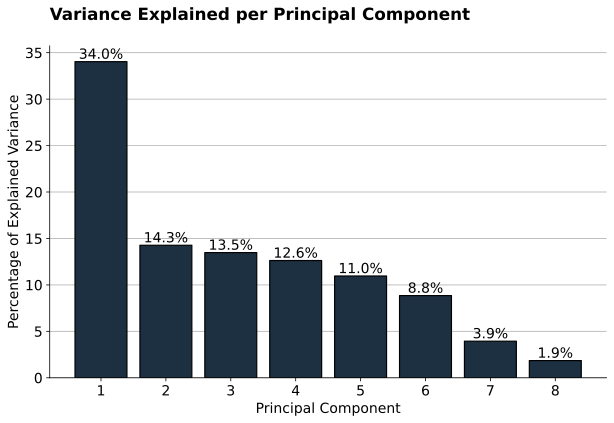

In [13]:
plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1, len(plot_y) + 1)

bars = plt.bar(plot_x, plot_y, align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

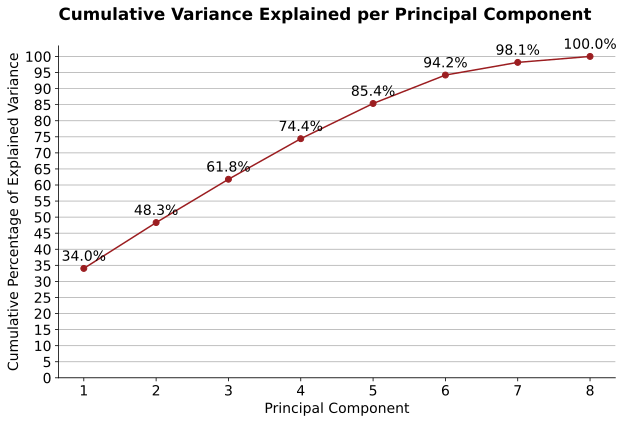

In [14]:
exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y = [sum(exp_var[:i+1]) for i in range(len(exp_var))]
plot_x = range(1, len(plot_y) + 1)

plt.plot(plot_x, plot_y, marker="o", color="#9B1D20")
for x, y in zip(plot_x, plot_y):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Percentage of Explained Variance")
plt.title("Cumulative Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)

plt.yticks(range(0, 101, 5))
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

In [15]:
import numpy as np

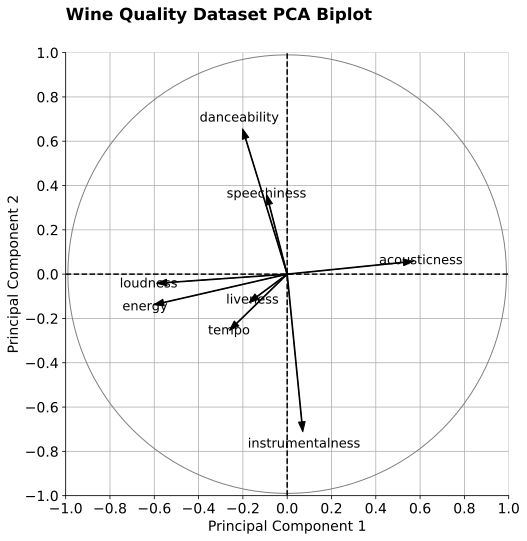

In [16]:
labels = songs_df.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()


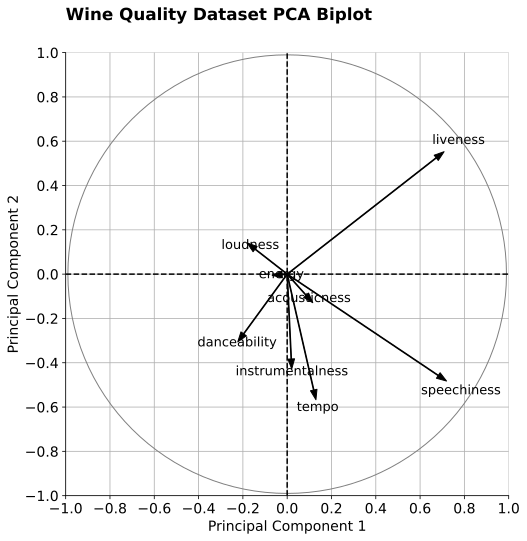

In [17]:
labels = songs_df.columns
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 2], dy=coeff[i, 3], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 2] * 1.15, y=coeff[i, 3] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()


In [18]:
indices

NameError: name 'indices' is not defined

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=5, 
                        algorithm='ball_tree').fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

In [ ]:
indices

array([[   0,   36,   45,  567, 1142],
       [   1,  578,  277,  129, 1130],
       [   2, 1140,   83,   90,  131],
       ...,
       [1269,  853,  256,  382, 1145],
       [1270, 1237, 1164, 1161,  161],
       [1271, 1081,  874, 1266, 1098]], dtype=int64)

In [ ]:
songs_df.index

MultiIndex([(            'Horchata',         'Contra'),
            (           'White Sky',         'Contra'),
            (             'Holiday',         'Contra'),
            (  'California English',         'Contra'),
            (            'Taxi Cab',         'Contra'),
            (                 'Run',         'Contra'),
            (             'Cousins',         'Contra'),
            (   'Giving Up The Gun',         'Contra'),
            (      'Diplomat’s Son',         'Contra'),
            ( 'I Think Ur A Contra',         'Contra'),
            ...
            ('A Lot's Gonna Change', 'Titanic Rising'),
            (           'Andromeda', 'Titanic Rising'),
            (            'Everyday', 'Titanic Rising'),
            ('Something to Believe', 'Titanic Rising'),
            (      'Titanic Rising', 'Titanic Rising'),
            (              'Movies', 'Titanic Rising'),
            (      'Mirror Forever', 'Titanic Rising'),
            (           'Wild Ti

In [ ]:
monotonic_index = pd.Index(list('abbc'))
monotonic_index

Index(['a', 'b', 'b', 'c'], dtype='object')

In [ ]:
songs_df.index = songs_df.index.droplevel(1)

In [ ]:
songs_df.index.get_loc('Horchata')

0

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler



# Function to find nearest neighbors by ID (without re-fitting the model)
def get_nearest_neighbors(df, nn_model, scaler, query_index, n_neighbors=3):

    # Get the scaled data point for the query_ndex (no need to re-scale everything)
    query_point = scaler.transform(df.loc[[query_index]])
    
    # Get the neighbors (including itself)
    distances, indices = nn_model.kneighbors(query_point, n_neighbors=n_neighbors)
    
    # Extract the neighbor IDs and distances
    neighbor_ids = df.index[indices.flatten()].tolist()
    neighbor_distances = distances.flatten().tolist()
    
    return list(zip(neighbor_ids, neighbor_distances))


In [ ]:
songs_df = pd.DataFrame(playlist_tracks_features)

features = [
    'artist',
    'danceability',
    'energy',
    # 'key',
    # 'loudness',
    # 'mode',
    # 'speechiness',
    'acousticness',
    'instrumentalness',
    # 'liveness',
    # 'valence',
    # 'tempo',
    # 'duration_ms'
    'popularity'
]

songs_df = songs_df.set_index(['name'])
songs_df = songs_df[features]
songs_df

,artist,danceability,energy,acousticness,instrumentalness,popularity
name,,,,,,
Horchata,Vampire Weekend,0.835,0.787,0.0741,0.000000,0
White Sky,Vampire Weekend,0.572,0.684,0.1140,0.007850,0
Holiday,Vampire Weekend,0.717,0.775,0.0222,0.000771,0
California English,Vampire Weekend,0.608,0.643,0.0845,0.000004,0
Taxi Cab,Vampire Weekend,0.694,0.364,0.2950,0.493000,0
...,...,...,...,...,...,...
Movies,Weyes Blood,0.189,0.362,0.6490,0.390000,0
Mirror Forever,Weyes Blood,0.334,0.283,0.5100,0.002440,0
Wild Time,Weyes Blood,0.385,0.423,0.5450,0.007280,0


In [ ]:
sp.search(q='Ichiko Aoba', type='artist', limit=1)['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ignRjbPmLvKdtMLj9a5Xs'},
 'followers': {'href': None, 'total': 748353},
 'genres': ['j-acoustic'],
 'href': 'https://api.spotify.com/v1/artists/6ignRjbPmLvKdtMLj9a5Xs',
 'id': '6ignRjbPmLvKdtMLj9a5Xs',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb0492fac92c61b57890860332',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051740492fac92c61b57890860332',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1780492fac92c61b57890860332',
   'width': 160}],
 'name': 'Ichiko Aoba',
 'popularity': 61,
 'type': 'artist',
 'uri': 'spotify:artist:6ignRjbPmLvKdtMLj9a5Xs'}

In [ ]:
'Adam Green' == 'Adam Green'

True

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


# Function to get artist genres
def get_artist_genre(artist_name):
    # Search for the artist by name
    limit=5
    results = sp.search(q=artist_name, type='artist', limit=limit)
    
    if results['artists']['items']:
        # sometimes the search gives incorrect results, we make sure the
        # artist is the one we're looking for
        for i in range(limit):
            
            artist = results['artists']['items'][i]  # Get the first search result
            # print(artist['name'])
            if artist_name == artist['name']:
                artist_genre = artist['genres'][0]  # Get genres
                return artist_genre
    else:
        return None

# Function to get artist genres
def get_artist_genres(artist_name):
    
    limit = 5
    # Search for the artist by name
    results = sp.search(q=artist_name, type='artist', limit=limit)
    if results['artists']['items']:
        # sometimes the search gives incorrect results, we make sure the
        # artist is the one we're looking for
        for i in range(limit):
            artist = results['artists']['items'][i]  # Get the first search result
            if artist_name == artist['name']:
                artist_genres = artist['genres']  # Get genres
        # artist_genre = artist['genres'][0]  # Get genres
                return artist_genres
        return None
    else:
        return None


In [ ]:

# Example usage
artist_name = 'Jonny Greenwood'
genre = get_artist_genre(artist_name=artist_name)
genres = get_artist_genres(artist_name=artist_name)


if artist_name:
    print(f"Genres for {artist_name}: {', '.join(genres)}")
    print(f"Genres for {artist_name}: {genre}")
else:
    print("Artist not found.")


Genres for Jonny Greenwood: british contemporary classical, british soundtrack, compositional ambient
Genres for Jonny Greenwood: british contemporary classical


In [ ]:
reults = sp.search(q='Adam Green', type='artist', limit=5)

In [ ]:
reults['artists']['items'][0]['name'] 

'Adam Green'

In [ ]:
songs_df.groupby('artist').first()

,danceability,energy,acousticness,instrumentalness,popularity
artist,,,,,
Adam Green,0.639,0.323,0.6790,0.000103,30
Alabama Shakes,0.590,0.667,0.1810,0.338000,0
Alvvays,0.327,0.948,0.0355,0.515000,0
Angel Olsen,0.545,0.128,0.9430,0.022500,0
Arcade Fire,0.616,0.682,0.0578,0.024100,55
...,...,...,...,...,...
Tobias Jesso Jr.,0.479,0.272,0.7860,0.186000,0
Vampire Weekend,0.835,0.787,0.0741,0.000000,0
Weyes Blood,0.221,0.347,0.6290,0.000665,0


In [ ]:
songs_df[songs_df.genre == 'alternative americana']

AttributeError: 'DataFrame' object has no attribute 'genre'

In [ ]:
reults = sp.search(q='The National', type='artist', limit=5)

In [ ]:
artists = sorted(songs_df.artist.unique())

In [ ]:
related_artists_dict = {}
for artist in artists:
    reults = sp.search(q=artist, type='artist', limit=1)
    related_artists = []
    artist_related_artists = sp.artist_related_artists(reults['artists']['items'][0]['id'])['artists']
    print(artist)
    related_artists_names = [rel_artist['name'].replace(' ', '_') for rel_artist in artist_related_artists[:5]]
    related_artists_dict[artist] = related_artists_names

Adam Green
Alabama Shakes
Alvvays
Angel Olsen
Arcade Fire
Arctic Monkeys
Bahamas
Beach House
Belle and Sebastian
Big Thief
Billie Eilish
Blur
Bon Iver
Broken Social Scene
Car Seat Headrest
Courtney Barnett
DIIV
Daft Punk
Damon Albarn
David Bowie
Deerhunter
Destroyer
Father John Misty
Feist
Fleet Foxes
Foxygen
Girls
Gorillaz
Grizzly Bear
Jake Bugg
Jonny Greenwood
Julie Byrne
Karen O
Kasabian
LCD Soundsystem
Lana Del Rey
Laura Marling
Leonard Cohen
Lorde
Low
M. Ward
MGMT
Massive Attack
Mitski
Motorama
Mount Eerie
New Order
Nick Cave & The Bad Seeds
PJ Harvey
Perfume Genius
Radiohead
Russian Red
Sharon Van Etten
Slowdive
Spoon
St. Vincent
Suede
Sufjan Stevens
Tame Impala
Tennis
The Black Keys
The Good, the Bad & the Queen
The Libertines
The Maccabees
The National
The Strokes
The War On Drugs
The xx
Tobias Jesso Jr.
Vampire Weekend
Weyes Blood
Wolf Alice
Yo La Tengo


In [ ]:
# reults = sp.search(q='Karen O', type='artist', limit=1)
# for i in range(20):
#     print(sp.artist_related_artists(reults['artists']['items'][0]['id'] )['artists'][i]['name'])


In [ ]:
import networkx as nx

# Initialize a graph
G = nx.Graph()

# Example data: a dictionary with artists and their related artists
artist_data = related_artists_dict

# Add nodes and edges to the graph
for artist, related_artists in artist_data.items():
    for related_artist in related_artists:
        G.add_edge(artist, related_artist)

# Visualize or analyze the graph
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: ['Adam Green', 'Binki Shapiro', 'The Moldy Peaches', 'Jeffrey Lewis', 'Alabama Shakes', 'Brittany Howard', 'St. Paul & The Broken Bones', 'Gary Clark Jr.', 'Alvvays', 'Snail Mail', 'Soccer Mommy', 'Japanese Breakfast', 'Angel Olsen', 'Sharon Van Etten', 'Julia Jacklin', 'Weyes Blood', 'Arcade Fire', 'LCD Soundsystem', 'The National', 'Interpol', 'Arctic Monkeys', 'The Neighbourhood', 'The Strokes', 'Cigarettes After Sex', 'Bahamas', 'Rayland Baxter', 'Fruit Bats', 'Shakey Graves', 'Beach House', 'Beach Fossils', 'Slowdive', 'Cocteau Twins', 'Belle and Sebastian', 'Camera Obscura', 'The Magnetic Fields', 'Yo La Tengo', 'Big Thief', 'Adrianne Lenker', 'Lucy Dacus', 'Billie Eilish', 'Olivia Rodrigo', 'Doja Cat', 'Melanie Martinez', 'Blur', 'Pulp', 'The Verve', 'Supergrass', 'Bon Iver', 'Matt Berninger', 'EL VY', 'Broken Social Scene', 'Wolf Parade', 'Kevin Drew', 'Clap Your Hands Say Yeah', 'Car Seat Headrest', 'The Microphones', 'Have A Nice Life', 'Neutral Milk Hotel', 'Courtney 

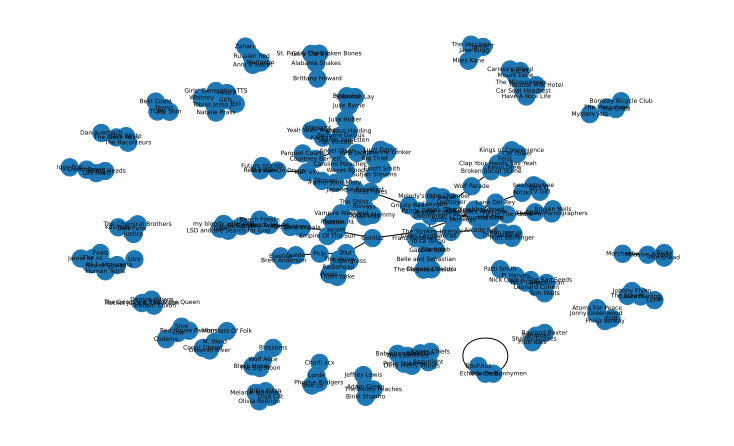

In [ ]:
# Calculate positions for all nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, 
        pos, 
        with_labels=True, 
        # node_color='lightblue', 
        # edge_color='gray', 
        # node_size=500, 
        font_size=6
        )

# Display the graph
plt.savefig("squares.png") 

plt.show()

In [ ]:
# Precompute genres for each artist
genre_lookup = songs_df.groupby('artist').apply(lambda x: get_artist_genres(x.name)).to_dict()

# Map the results back to the DataFrame
songs_df['genre'] = songs_df['artist'].map(genre_lookup)

In [ ]:
songs_df['related_artists'] = songs_df['artist'].map(related_artists_dict)
songs_df

,artist,danceability,energy,acousticness,instrumentalness,popularity,genre,related_artists
name,,,,,,,,
Horchata,Vampire Weekend,0.835,0.787,0.0741,0.000000,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,..."
White Sky,Vampire Weekend,0.572,0.684,0.1140,0.007850,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,..."
Holiday,Vampire Weekend,0.717,0.775,0.0222,0.000771,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,..."
California English,Vampire Weekend,0.608,0.643,0.0845,0.000004,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,..."
Taxi Cab,Vampire Weekend,0.694,0.364,0.2950,0.493000,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,..."
...,...,...,...,...,...,...,...,...
Movies,Weyes Blood,0.189,0.362,0.6490,0.390000,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea..."
Mirror Forever,Weyes Blood,0.334,0.283,0.5100,0.002440,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea..."
Wild Time,Weyes Blood,0.385,0.423,0.5450,0.007280,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea..."


In [ ]:
def custom_tokenizer(text):
    return text.split(' ')

In [ ]:
# Convert related artists to a string for vectorization
songs_df['related_artists_str'] = songs_df['related_artists'].apply(lambda x: ' '.join(x))
songs_df['genre_str'] = songs_df['genre'].apply(lambda x: ' '.join(x))


# Use TF-IDF or CountVectorizer to vectorize the related artists
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
artist_features = vectorizer.fit_transform(songs_df['related_artists_str'])
# Convert to a DataFrame
artist_features_df = pd.DataFrame(artist_features.toarray(), columns=vectorizer.get_feature_names_out())

genre_features = vectorizer.fit_transform(songs_df['genre_str'])
genre_features_df = pd.DataFrame(genre_features.toarray(), columns=vectorizer.get_feature_names_out())

c:\Users\Dell\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Dell\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
songs_df

,artist,danceability,energy,acousticness,instrumentalness,popularity,genre,related_artists,related_artists_str,genre_str
name,,,,,,,,,,
Horchata,Vampire Weekend,0.835,0.787,0.0741,0.000000,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,...",Passion_Pit The_Shins Phoenix Arcade_Fire Two_...,baroque pop chamber pop garage rock indie rock...
White Sky,Vampire Weekend,0.572,0.684,0.1140,0.007850,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,...",Passion_Pit The_Shins Phoenix Arcade_Fire Two_...,baroque pop chamber pop garage rock indie rock...
Holiday,Vampire Weekend,0.717,0.775,0.0222,0.000771,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,...",Passion_Pit The_Shins Phoenix Arcade_Fire Two_...,baroque pop chamber pop garage rock indie rock...
California English,Vampire Weekend,0.608,0.643,0.0845,0.000004,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,...",Passion_Pit The_Shins Phoenix Arcade_Fire Two_...,baroque pop chamber pop garage rock indie rock...
Taxi Cab,Vampire Weekend,0.694,0.364,0.2950,0.493000,0,"[baroque pop, chamber pop, garage rock, indie ...","[Passion_Pit, The_Shins, Phoenix, Arcade_Fire,...",Passion_Pit The_Shins Phoenix Arcade_Fire Two_...,baroque pop chamber pop garage rock indie rock...
...,...,...,...,...,...,...,...,...,...,...
Movies,Weyes Blood,0.189,0.362,0.6490,0.390000,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea...",Angel_Olsen Caroline_Polachek Japanese_Breakfa...,art pop chamber pop dream pop experimental fol...
Mirror Forever,Weyes Blood,0.334,0.283,0.5100,0.002440,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea...",Angel_Olsen Caroline_Polachek Japanese_Breakfa...,art pop chamber pop dream pop experimental fol...
Wild Time,Weyes Blood,0.385,0.423,0.5450,0.007280,0,"[art pop, chamber pop, dream pop, experimental...","[Angel_Olsen, Caroline_Polachek, Japanese_Brea...",Angel_Olsen Caroline_Polachek Japanese_Breakfa...,art pop chamber pop dream pop experimental fol...


In [ ]:
songs_df_prep = pd.concat([songs_df.reset_index(), artist_features_df, genre_features_df], axis=1)
songs_df_prep = songs_df_prep.set_index('name')
songs_df_prep = songs_df_prep.drop(['artist', 'related_artists', 'related_artists_str', 'genre_str',  'genre'], axis=1)
songs_df_prep

,danceability,energy,acousticness,instrumentalness,popularity,adrianne_lenker,air,aldous_harding,alex_g,alt-j,...,synthpop,toronto,trip,twee,uk,vancouver,washington,wave,weird,york
name,,,,,,,,,,,,,,,,,,,,,
Horchata,0.835,0.787,0.0741,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
White Sky,0.572,0.684,0.1140,0.007850,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Holiday,0.717,0.775,0.0222,0.000771,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
California English,0.608,0.643,0.0845,0.000004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taxi Cab,0.694,0.364,0.2950,0.493000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Movies,0.189,0.362,0.6490,0.390000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mirror Forever,0.334,0.283,0.5100,0.002440,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wild Time,0.385,0.423,0.5450,0.007280,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
songs_df_prep

NameError: name 'songs_df_prep' is not defined

In [110]:
X_scaled

array([[ 2.29033645,  0.93716585, -0.86027515, ..., -0.38519695,
        -0.08901646, -0.10161523],
       [ 0.59206831,  0.52087905, -0.74513117, ..., -0.38519695,
        -0.08901646, -0.10161523],
       [ 1.52837584,  0.88866642, -1.0100489 , ..., -0.38519695,
        -0.08901646, -0.10161523],
       ...,
       [-0.61544554, -0.53398363,  0.49865468, ..., -0.38519695,
        -0.08901646, -0.10161523],
       [-2.0037636 , -1.59692954,  1.61546472, ..., -0.38519695,
        -0.08901646, -0.10161523],
       [-2.37182932, -1.77476079,  1.22587983, ..., -0.38519695,
        -0.08901646, -0.10161523]])

In [104]:
from sklearn.neighbors import NearestNeighbors

scaler = StandardScaler()
X_scaled = scaler.fit_transform(songs_df_prep)

nn = NearestNeighbors(n_neighbors=3, 
                      metric='euclidean',)
nn.fit(X_scaled)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [109]:

# Example usage
query_index = 'Space Song'
neighbors = get_nearest_neighbors(songs_df_prep, nn, scaler, query_index, n_neighbors=45)

print(f"The nearest neighbors for {query_index} are:")
for neighbor_id, distance in neighbors:
    print(f"Song: {neighbor_id}, Distance: {round(distance,2)}")


The nearest neighbors for Space Song are:
Song: Space Song, Distance: 0.0
Song: New Year, Distance: 0.66
Song: Myth, Distance: 0.75
Song: Woo, Distance: 0.79
Song: Wild, Distance: 0.88
Song: Take Care, Distance: 0.93
Song: Sparks, Distance: 1.32
Song: Silver Soul, Distance: 1.35
Song: Norway, Distance: 1.38
Song: Walk In The Park, Distance: 1.4
Song: Troublemaker, Distance: 1.45
Song: Used To Be, Distance: 1.56
Song: Beyond Love, Distance: 1.6
Song: Lover Of Mine, Distance: 1.6
Song: Wishes, Distance: 1.68
Song: Other People, Distance: 1.77
Song: The Hours, Distance: 1.77
Song: On the Sea, Distance: 1.87
Song: 10 Mile Stereo, Distance: 1.9
Song: Wildflower, Distance: 1.92
Song: Better Times, Distance: 1.95
Song: Real Love, Distance: 2.09
Song: Lazuli, Distance: 2.11
Song: 10:37, Distance: 2.14
Song: Bluebird, Distance: 2.25
Song: Lose Your Smile, Distance: 2.27
Song: Zebra, Distance: 2.33
Song: Drunk In LA, Distance: 2.4
Song: Pay No Mind, Distance: 2.46
Song: Dark Spring, Distance: 2.

In [373]:

# Example usage
query_index = 'Zebra'
neighbors = get_nearest_neighbors(songs_df, nn, scaler, query_index, n_neighbors=15)

print(f"The nearest neighbors for {query_index} are:")
for neighbor_id, distance in neighbors:
    print(f"Song: {neighbor_id}, Distance: {round(distance,2)}")


The nearest neighbors for Zebra are:
Song: Zebra, Distance: 0.0
Song: Real Love, Distance: 0.49
Song: 10:37, Distance: 0.68
Song: Better Times, Distance: 0.74
Song: Used To Be, Distance: 0.85
Song: On the Sea, Distance: 0.99
Song: Beyond Love, Distance: 1.86
Song: Take Care, Distance: 1.91
Song: Lover Of Mine, Distance: 1.92
Song: Silver Soul, Distance: 1.96
Song: Norway, Distance: 2.06
Song: Wildflower, Distance: 2.15
Song: Walk In The Park, Distance: 2.27
Song: Bluebird, Distance: 2.28
Song: Space Song, Distance: 2.33


In [374]:

# Example usage
query_index = 'Horchata'
neighbors = get_nearest_neighbors(songs_df, nn, scaler, query_index, n_neighbors=15)

print(f"The nearest neighbors for {query_index} are:")
for neighbor_id, distance in neighbors:
    print(f"Song: {neighbor_id}, Distance: {round(distance,2)}")


The nearest neighbors for Horchata are:
Song: Horchata, Distance: 0.0
Song: Holiday, Distance: 0.78
Song: Finger Back, Distance: 1.21
Song: Unbelievers, Distance: 1.25
Song: Giving Up The Gun, Distance: 1.31
Song: Run, Distance: 1.32
Song: California English, Distance: 1.58
Song: Everlasting Arms, Distance: 1.63
Song: Ya Hey, Distance: 1.74
Song: White Sky, Distance: 1.75
Song: Step, Distance: 2.04
Song: Diplomat’s Son, Distance: 2.18
Song: Cousins, Distance: 2.21
Song: Worship You, Distance: 2.4
Song: Don't Lie, Distance: 2.52


In [121]:
songs_df.loc[query_index]

danceability          0.8350
energy                0.7870
loudness             -7.0780
speechiness           0.1430
acousticness          0.0741
instrumentalness      0.0000
liveness              0.2940
tempo               120.0000
Name: Horchata, dtype: float64

In [90]:
X_scaled

array([[ 2.29033645,  0.93716585,  0.52454201, ..., -0.71074795,
         0.95168299,  0.01894278],
       [ 0.59206831,  0.52087905,  0.86441052, ..., -0.68524798,
         1.49180363,  0.55370849],
       [ 1.52837584,  0.88866642,  0.9587134 , ..., -0.70824343,
        -0.34460655,  1.22295471],
       ...,
       [-0.61544554, -0.53398363, -0.15046806, ..., -0.68709957,
         0.30353822,  0.71276821],
       [-2.0037636 , -1.59692954, -1.25823143, ..., -0.71067616,
        -0.50664275, -1.46793153],
       [-2.37182932, -1.77476079, -2.37710316, ...,  2.35899322,
        -0.6316421 , -1.26320552]])

In [42]:
pca_res_df

,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
name,album,,,,,,,,
3WW,RELAXER,1.834579,-1.210888,1.607996,-1.027009,-0.190034,0.276373,-0.435808,-0.355465
Baby Driver,Baby Driver (Music from the Motion Picture),-0.965761,0.194703,-0.916674,-0.777162,-0.800301,-1.105137,0.187379,0.577338
We Were Beautiful,How To Solve Our Human Problems (Part 1),-1.834144,-0.950608,-0.663070,-1.035725,-0.414178,-0.288339,-0.113495,-0.075482
Machinist,Soft Sounds from Another Planet,-1.925134,-0.524803,0.250339,1.537509,-0.755551,0.045159,-0.558497,0.076003
The Truest Stars We Know,Beast Epic,1.880931,-1.000654,0.579753,-0.171129,0.256267,0.208665,0.295162,0.416020
...,...,...,...,...,...,...,...,...,...
Follow My Voice,Not Even Happiness,2.610729,-0.425918,0.267479,0.140343,0.055134,-0.516641,0.125159,-0.272274
Impossible Germany,Sky Blue Sky,-0.739326,-0.992092,-0.040523,-0.192097,0.390721,0.413824,1.085875,0.450818
Everyone Knows,Slowdive,-1.851205,1.840232,-1.010340,-0.360997,0.928522,0.849422,-0.258578,0.018560


In [50]:
songs_df.index.get_level_values(0)

Index(['3WW', 'Baby Driver', 'We Were Beautiful', 'Machinist',
       'The Truest Stars We Know', 'Continental Breakfast', 'Sunsetz',
       'Pleasure', 'Mildenhall', 'Floating Cathedral',
       ...
       'On Another Ocean (January / June)', 'Three Rings',
       'Nobody Else Will Be There', 'Nothing, Not Nearly',
       'Mouth Guards of the Apocalypse', 'Follow My Voice',
       'Impossible Germany', 'Everyone Knows', 'Mystery of Love',
       'Thinking of a Place'],
      dtype='object', name='name', length=101)

In [88]:
import plotly.express as px
fig = px.scatter_3d(pca_res_df, x='PC1', y='PC2', z='PC3', hover_name=songs_df.index.get_level_values(0))
# fig = px.scatter(pca_res_df, x='PC1', y='PC2', hover_name=songs_df.index.get_level_values(0))
# Set constant marker size
fig.update_traces(marker=dict(size=3))  # Set all markers to size 10

# Set constant marker shape (e.g., 'circle')
fig.update_traces(marker=dict(symbol='square')) 
fig.show()

In [37]:
get_track_features('6uHN30qEgxZ25VPhnrXsLr')

['Gris, Pt. 2',
 'Gris (Original Game Soundtrack)',
 'Berlinist',
 '2018-12-13',
 146250,
 37,
 0.114,
 0.0214,
 0.114,
 0.174,
 7.51e-05,
 0.225,
 -10.252,
 0.0376,
 152.765,
 4]

In [35]:
sp.audio_features('6uHN30qEgxZ25VPhnrXsLr')

[{'danceability': 0.114,
  'energy': 0.174,
  'key': 5,
  'loudness': -10.252,
  'mode': 0,
  'speechiness': 0.0376,
  'acousticness': 0.0214,
  'instrumentalness': 7.51e-05,
  'liveness': 0.225,
  'valence': 0.0515,
  'tempo': 152.765,
  'type': 'audio_features',
  'id': '6uHN30qEgxZ25VPhnrXsLr',
  'uri': 'spotify:track:6uHN30qEgxZ25VPhnrXsLr',
  'track_href': 'https://api.spotify.com/v1/tracks/6uHN30qEgxZ25VPhnrXsLr',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6uHN30qEgxZ25VPhnrXsLr',
  'duration_ms': 146250,
  'time_signature': 4}]

In [34]:
sp.track('6uHN30qEgxZ25VPhnrXsLr')['explicit']

False

In [25]:
sp.audio_features([results['items'][i]['track']['uri'] for i, result in enumerate(results['items'])])

[{'danceability': 0.114,
  'energy': 0.174,
  'key': 5,
  'loudness': -10.252,
  'mode': 0,
  'speechiness': 0.0376,
  'acousticness': 0.0214,
  'instrumentalness': 7.51e-05,
  'liveness': 0.225,
  'valence': 0.0515,
  'tempo': 152.765,
  'type': 'audio_features',
  'id': '6uHN30qEgxZ25VPhnrXsLr',
  'uri': 'spotify:track:6uHN30qEgxZ25VPhnrXsLr',
  'track_href': 'https://api.spotify.com/v1/tracks/6uHN30qEgxZ25VPhnrXsLr',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6uHN30qEgxZ25VPhnrXsLr',
  'duration_ms': 146250,
  'time_signature': 4},
 {'danceability': 0.278,
  'energy': 0.0036,
  'key': 1,
  'loudness': -37.126,
  'mode': 1,
  'speechiness': 0.039,
  'acousticness': 0.959,
  'instrumentalness': 0.886,
  'liveness': 0.101,
  'valence': 0.0718,
  'tempo': 79.932,
  'type': 'audio_features',
  'id': '6iGDvkgyCqk5K773nAMEla',
  'uri': 'spotify:track:6iGDvkgyCqk5K773nAMEla',
  'track_href': 'https://api.spotify.com/v1/tracks/6iGDvkgyCqk5K773nAMEla',
  'analysis_url': 'htt

In [14]:
results = sp.current_user_saved_tracks(limit=50)
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Berlinist  –  Gris, Pt. 2
1 Berlinist  –  Firmament
2 Berlinist  –  Komorebi, Pt. 2
3 Amos Roddy  –  Lost but Warm
4 Amos Roddy  –  The Blue Archer
5 Amos Roddy  –  Memory Cloud
6 Amos Roddy  –  Into the Green Vale
7 Amos Roddy  –  Mischievous Alchemy
8 Amos Roddy  –  A Simple Question
9 Amos Roddy  –  Beneath Fog
10 Amos Roddy  –  The Last Color of Land
11 Amos Roddy  –  Circle of Sparrows
12 Amos Roddy  –  Familiar Light
13 Choir Boy  –  Blood Moon
14 Dr. Dog  –  Still Can’t Believe
15 Choir Boy  –  Angel Dog
16 DeVotchKa  –  This Place Is Haunted
17 DeVotchKa  –  How It Ends
18 Labi Siffre  –  'Till Forever
19 Labi Siffre  –  My Song
20 Labi Siffre  –  Hotel Room Song
21 Labi Siffre  –  Crying, Laughing, Loving, Lying
22 Labi Siffre  –  Blue Lady
23 Labi Siffre  –  Gimme Some More
24 Labi Siffre  –  It Must Be Love
25 Labi Siffre  –  Fool Me a Good Night
26 Hozier  –  Too Sweet
27 Crumb  –  Ice Melt
28 Janis Joplin  –  Piece Of My Heart
29 Frankie Avalon  –  Why?
30 The Smiths  – 

In [3]:
len(results['items'])

50

In [5]:
import os

print("SPOTIPY_CLIENT_ID:", os.getenv("SPOTIPY_CLIENT_ID"))

SPOTIPY_CLIENT_ID: None


In [4]:
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

if len(sys.argv) > 1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Radiohead'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.